In [ ]:
#Importing the libraries

In [2]:
%matplotlib notebook
import numpy as np
import re
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split

train = pd.read_csv('C:/Users/Jubair/Desktop/train.csv')
test=pd.read_csv('C:/Users/Jubair/Desktop/test.csv')

In [3]:
PassengerId=test['PassengerId']

In [4]:
#concating the test and train

In [5]:
Survived = train['Survived']

df_whole = pd.concat([train, test],ignore_index=True)
df_whole= df_whole.drop(columns=['Survived'])
df_whole.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 11 columns):
Age            1046 non-null float64
Cabin          295 non-null object
Embarked       1307 non-null object
Fare           1308 non-null float64
Name           1309 non-null object
Parch          1309 non-null int64
PassengerId    1309 non-null int64
Pclass         1309 non-null int64
Sex            1309 non-null object
SibSp          1309 non-null int64
Ticket         1309 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 112.6+ KB


C:\Users\Jubair\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  This is separate from the ipykernel package so we can avoid doing imports until


<IPython.core.display.Javascript object>


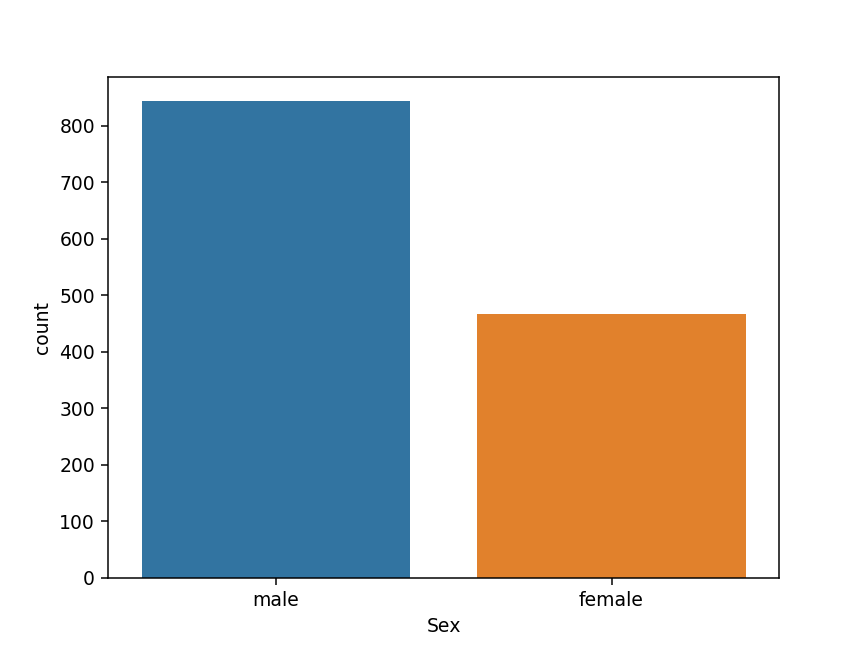

In [6]:
import seaborn as sns
sns.countplot('Sex',data=df_whole)

C:\Users\Jubair\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


<IPython.core.display.Javascript object>


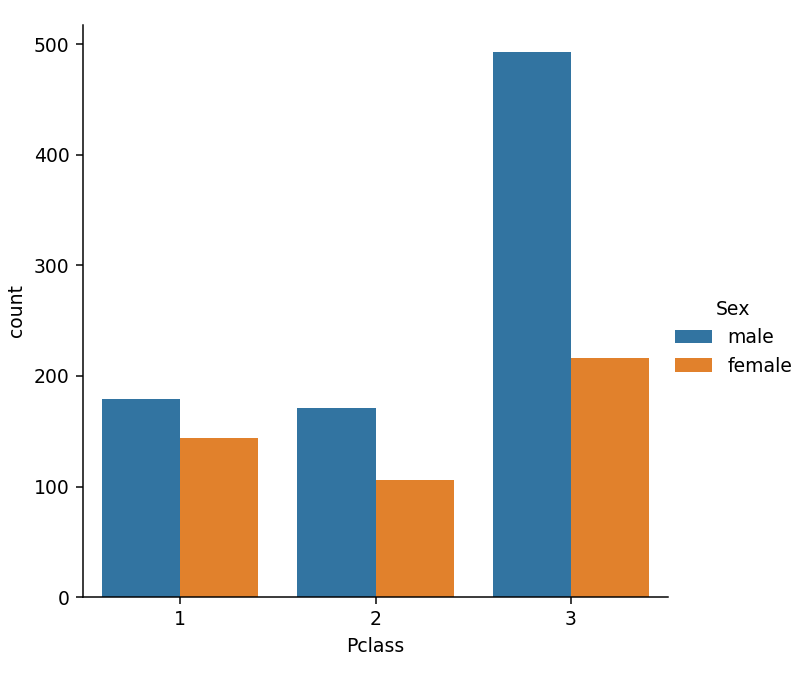

In [46]:
sns.factorplot('Pclass',data=df_whole,hue='Sex',kind='count')



In [7]:
#insering mean value to the empty fare attribute

In [8]:
mean_Fare = (df_whole.groupby('Pclass')['Fare'].mean()).values
df_whole.loc[(df_whole['Fare']==0) & (df_whole['Pclass']==1),'Fare']  = mean_Fare[0] 
df_whole.loc[(df_whole['Fare']==0) & (df_whole['Pclass']==2),'Fare']  = mean_Fare[1]
df_whole.loc[(df_whole['Fare']==0) & (df_whole['Pclass']==3),'Fare']  = mean_Fare[2]
df_whole['Fare'] = df_whole['Fare'].fillna(df_whole['Fare'].mean()).astype(int)
df_whole['Fare'] 

0         7
1        71
2         7
3        53
4         8
5         8
6        51
7        21
8        11
9        30
10       16
11       26
12        8
13       31
14        7
15       16
16       29
17       13
18       18
19        7
20       26
21       13
22        8
23       35
24       21
25       31
26        7
27      263
28        7
29        7
       ... 
1279      7
1280     21
1281     93
1282     39
1283     20
1284     10
1285     22
1286     60
1287      7
1288     79
1289      7
1290      7
1291    164
1292     21
1293     59
1294     47
1295     27
1296     13
1297     10
1298    211
1299      7
1300     13
1301      7
1302     90
1303      7
1304      8
1305    108
1306      7
1307      8
1308     22
Name: Fare, Length: 1309, dtype: int32

In [9]:
df_whole['with Cabin'] = df_whole[['Cabin']].applymap(lambda x: 0 if pd.isnull(x) else 1)
df_whole['with Cabin']

0       0
1       1
2       0
3       1
4       0
5       0
6       1
7       0
8       0
9       0
10      1
11      1
12      0
13      0
14      0
15      0
16      0
17      0
18      0
19      0
20      0
21      1
22      0
23      1
24      0
25      0
26      0
27      1
28      0
29      0
       ..
1279    0
1280    0
1281    1
1282    1
1283    0
1284    0
1285    0
1286    1
1287    0
1288    1
1289    0
1290    0
1291    1
1292    0
1293    0
1294    0
1295    1
1296    1
1297    0
1298    1
1299    0
1300    0
1301    0
1302    1
1303    0
1304    0
1305    1
1306    0
1307    0
1308    0
Name: with Cabin, Length: 1309, dtype: int64

In [10]:
df_whole['Name']

0                                 Braund, Mr. Owen Harris
1       Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                  Heikkinen, Miss. Laina
3            Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                                Allen, Mr. William Henry
5                                        Moran, Mr. James
6                                 McCarthy, Mr. Timothy J
7                          Palsson, Master. Gosta Leonard
8       Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)
9                     Nasser, Mrs. Nicholas (Adele Achem)
10                        Sandstrom, Miss. Marguerite Rut
11                               Bonnell, Miss. Elizabeth
12                         Saundercock, Mr. William Henry
13                            Andersson, Mr. Anders Johan
14                   Vestrom, Miss. Hulda Amanda Adolfina
15                       Hewlett, Mrs. (Mary D Kingcome) 
16                                   Rice, Master. Eugene
17            

In [11]:
#keep the title from the name and inserting value to the title of the name

In [12]:

def title_extract(name):
    title_search = re.search(' ([A-Za-z]+)\.', name)
    if title_search:
        return title_search.group(1)
    return ""
df_whole['Title'] = df_whole['Name'].apply(title_extract)
df_whole['Title'] = df_whole['Title'].replace(['Lady', 'Countess', 'Don', 'Sir', 'Jonkheer', 'Dona'], 'Royal')
df_whole['Title'] = df_whole['Title'].replace(['Capt', 'Col', 'Dr', 'Major', 'Rev', ], 'Other')
df_whole['Title'] = df_whole['Title'].replace('Mlle', 'Miss')
df_whole['Title'] = df_whole['Title'].replace('Ms', 'Miss')
df_whole['Title'] = df_whole['Title'].replace('Mme', 'Mrs')
df_whole['Title'] = df_whole['Title'].map( {'Master': 1, 'Miss': 2, 'Mr': 3, 'Mrs':4, 'Other': 5, 'Royal':6} ).astype(int)

In [13]:
df_whole['Family_member'] = df_whole['SibSp'] + df_whole['Parch'] + 1

In [14]:
#dropping the unecessary attributes

In [15]:
df_whole = df_whole.drop(columns=['Name','Ticket','Cabin', 'Parch', 'SibSp', 'PassengerId'])
df_whole.head()

,Age,Embarked,Fare,Pclass,Sex,with Cabin,Title,Family_member
0,22.0,S,7,3,male,0,3,2
1,38.0,C,71,1,female,1,4,2
2,26.0,S,7,3,female,0,2,1
3,35.0,S,53,1,female,1,4,2
4,35.0,S,8,3,male,0,3,1


In [16]:
df_whole['Age'] = df_whole['Age'].fillna(df_whole['Age'].mean()).astype(int)

In [17]:
df_whole.Sex.replace(to_replace=dict(female=0, male=1), inplace=True)


In [18]:
df_whole.Embarked[df_whole.Embarked == 'C'] = 0 
df_whole.Embarked[df_whole.Embarked == 'S'] = 1
df_whole.Embarked[df_whole.Embarked == 'Q'] = 3 

C:\Users\Jubair\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\Jubair\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Jubair\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [19]:
#filling up the null embarked attribute with zeros

In [20]:
df_whole['Embarked'] = df_whole['Embarked'].fillna(0)

In [21]:
df_whole.head()

,Age,Embarked,Fare,Pclass,Sex,with Cabin,Title,Family_member
0,22,1,7,3,1,0,3,2
1,38,0,71,1,0,1,4,2
2,26,1,7,3,0,0,2,1
3,35,1,53,1,0,1,4,2
4,35,1,8,3,1,0,3,1


In [22]:
df_whole.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 8 columns):
Age              1309 non-null int32
Embarked         1309 non-null int64
Fare             1309 non-null int32
Pclass           1309 non-null int64
Sex              1309 non-null int64
with Cabin       1309 non-null int64
Title            1309 non-null int32
Family_member    1309 non-null int64
dtypes: int32(3), int64(5)
memory usage: 66.6 KB


In [23]:
#saving the modified csv

In [24]:
df_whole.to_csv("C:/Users/Jubair/Desktop/output_filename.csv", index=False, encoding='utf8')

PermissionError: [Errno 13] Permission denied: 'C:/Users/Jubair/Desktop/output_filename.csv'

In [77]:
#spliting the train data

In [25]:
## Creating the traning dataset
train1 = df_whole.iloc[0:891]
# Add labels
train1['Survived'] = Survived
train1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
Age              891 non-null int32
Embarked         891 non-null int64
Fare             891 non-null int32
Pclass           891 non-null int64
Sex              891 non-null int64
with Cabin       891 non-null int64
Title            891 non-null int32
Family_member    891 non-null int64
Survived         891 non-null int64
dtypes: int32(3), int64(6)
memory usage: 52.3 KB


C:\Users\Jubair\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [26]:
train1

,Age,Embarked,Fare,Pclass,Sex,with Cabin,Title,Family_member,Survived
0,22,1,7,3,1,0,3,2,0
1,38,0,71,1,0,1,4,2,1
2,26,1,7,3,0,0,2,1,1
3,35,1,53,1,0,1,4,2,1
4,35,1,8,3,1,0,3,1,0
5,29,3,8,3,1,0,3,1,0
6,54,1,51,1,1,1,3,1,0
7,2,1,21,3,1,0,1,5,0
8,27,1,11,3,0,0,4,3,1
9,14,0,30,2,0,0,4,2,1


In [79]:
#plotting the heatmap

<IPython.core.display.Javascript object>


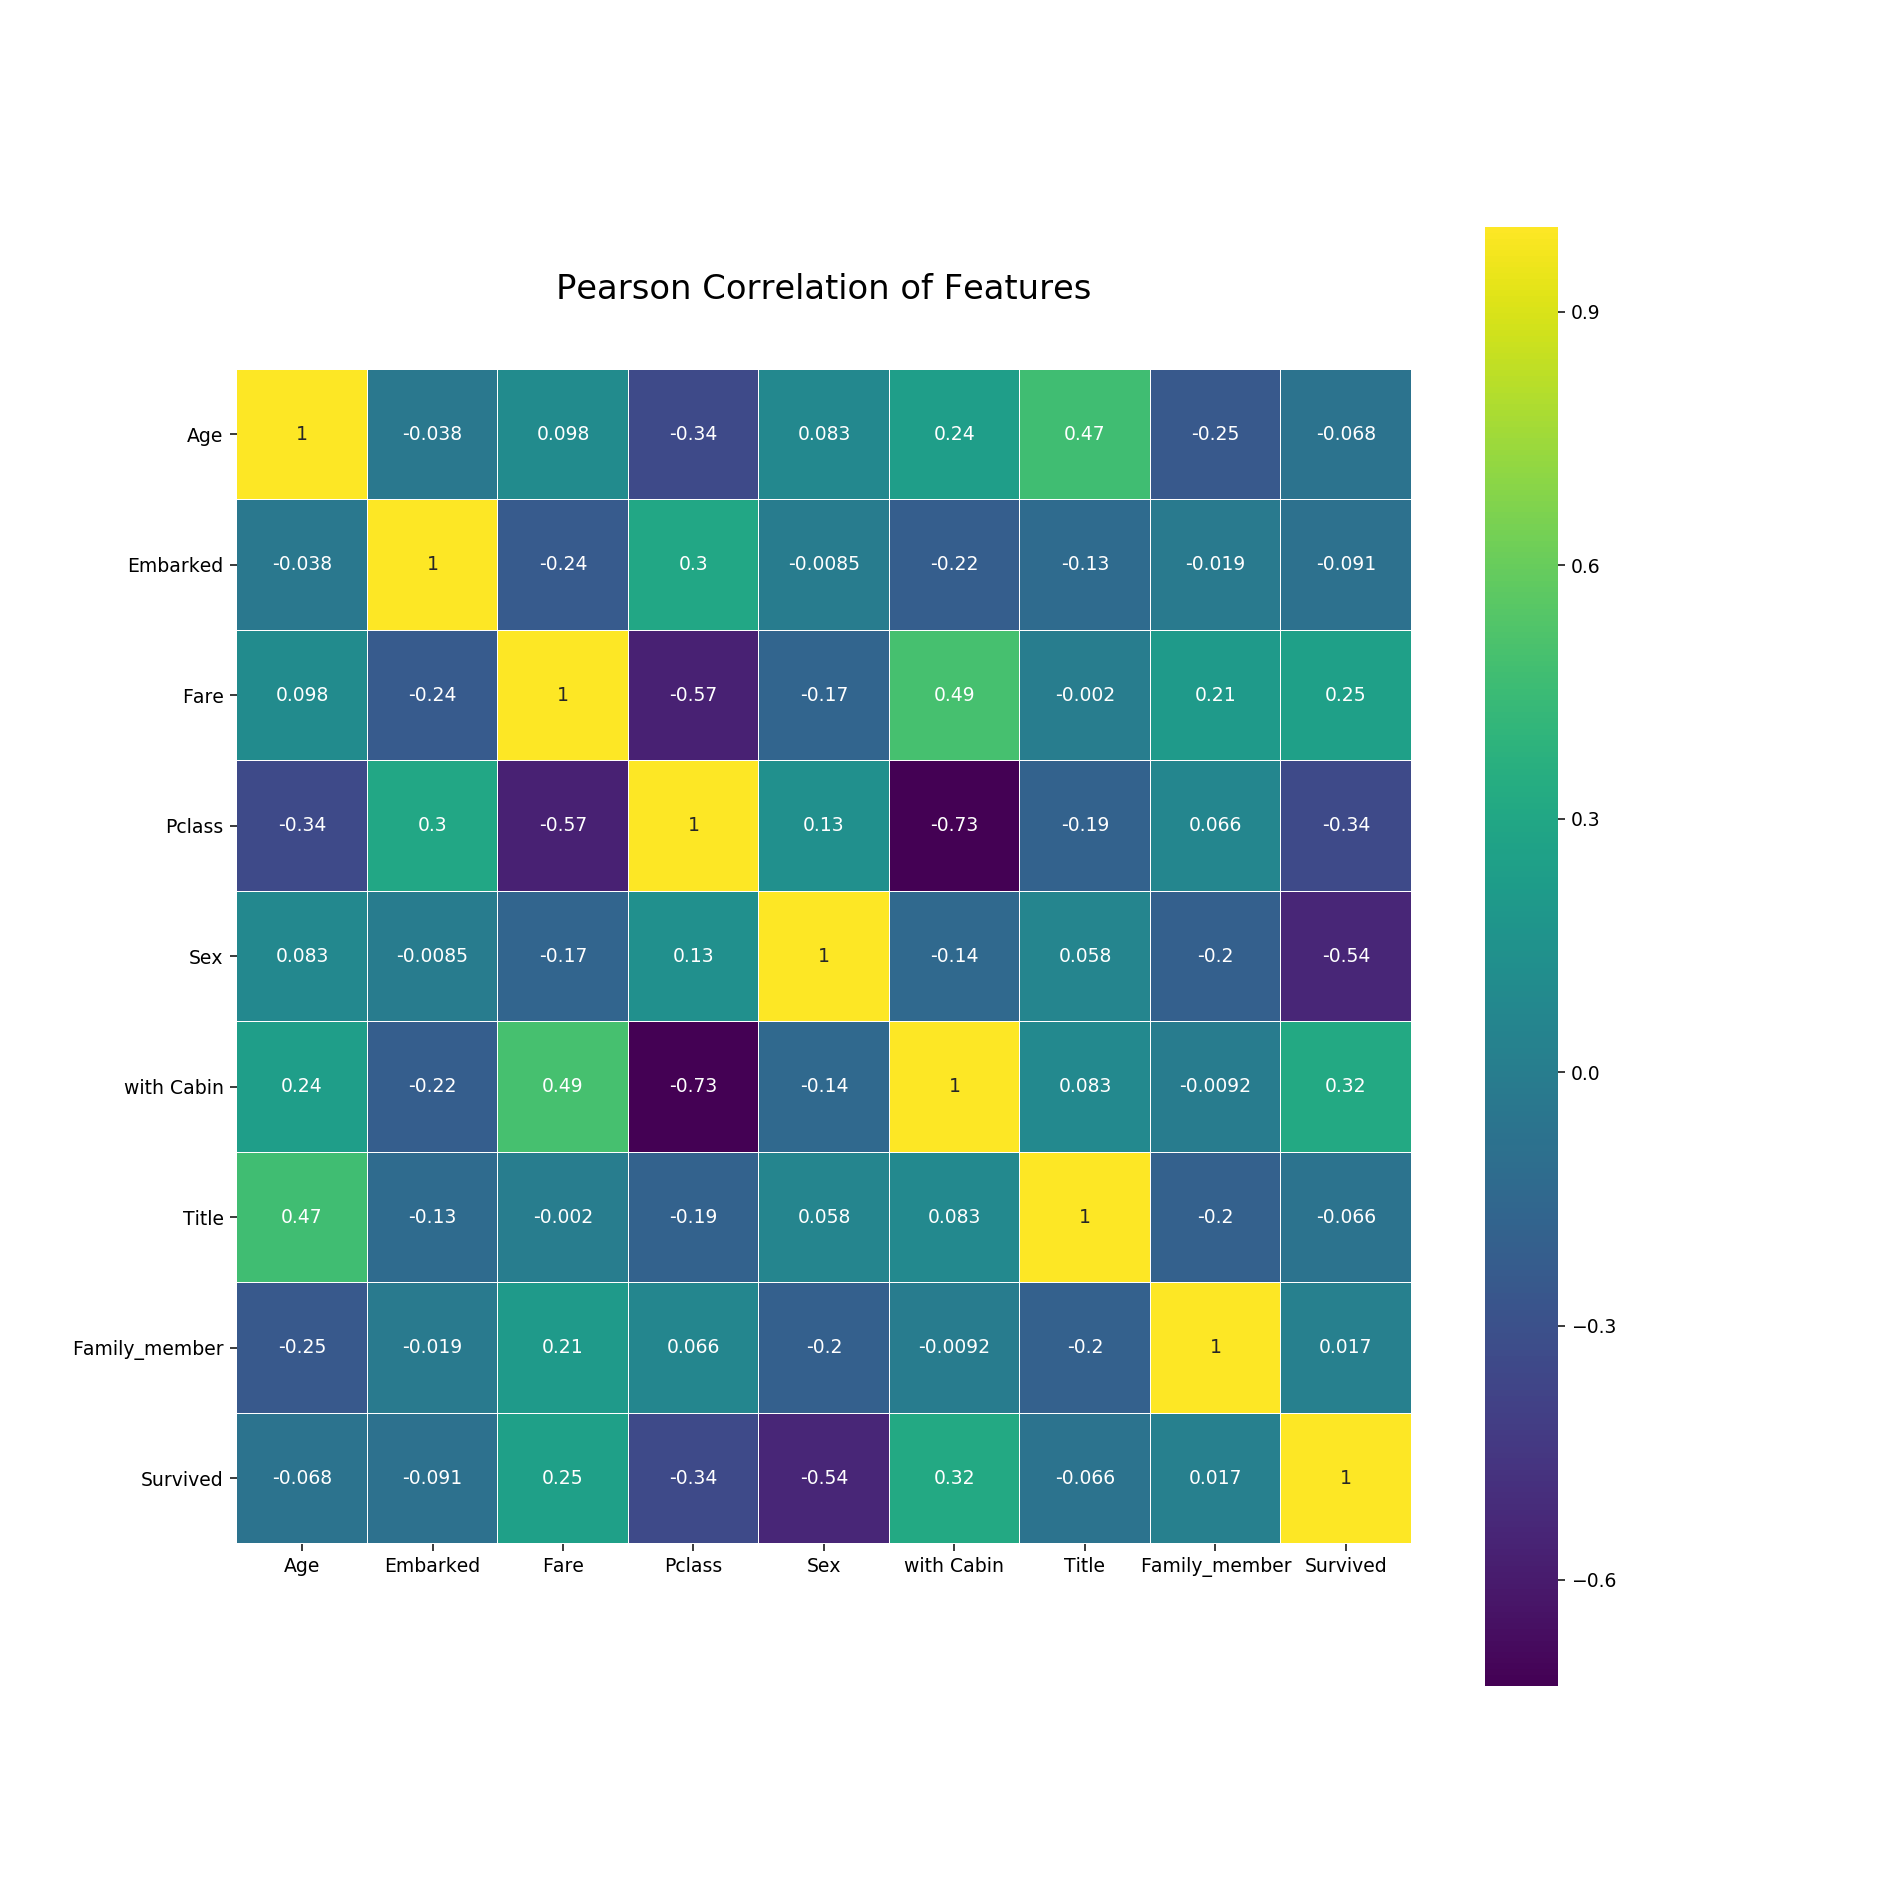

In [28]:
## Plot Pearson's Correlation Matrix
colormap = plt.cm.viridis
plt.figure(figsize=(14,14))
plt.title('Pearson Correlation of Features', y=1.05, size=18)
sns.heatmap(train1.astype(float).corr(),linewidths=0.08,vmax=1, square=True, cmap=colormap, linecolor='white', annot=True)

In [69]:
#plotting the scatter matrix of modified data

C:\Users\Jubair\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: pandas.scatter_matrix is deprecated, use pandas.plotting.scatter_matrix instead
  


<IPython.core.display.Javascript object>


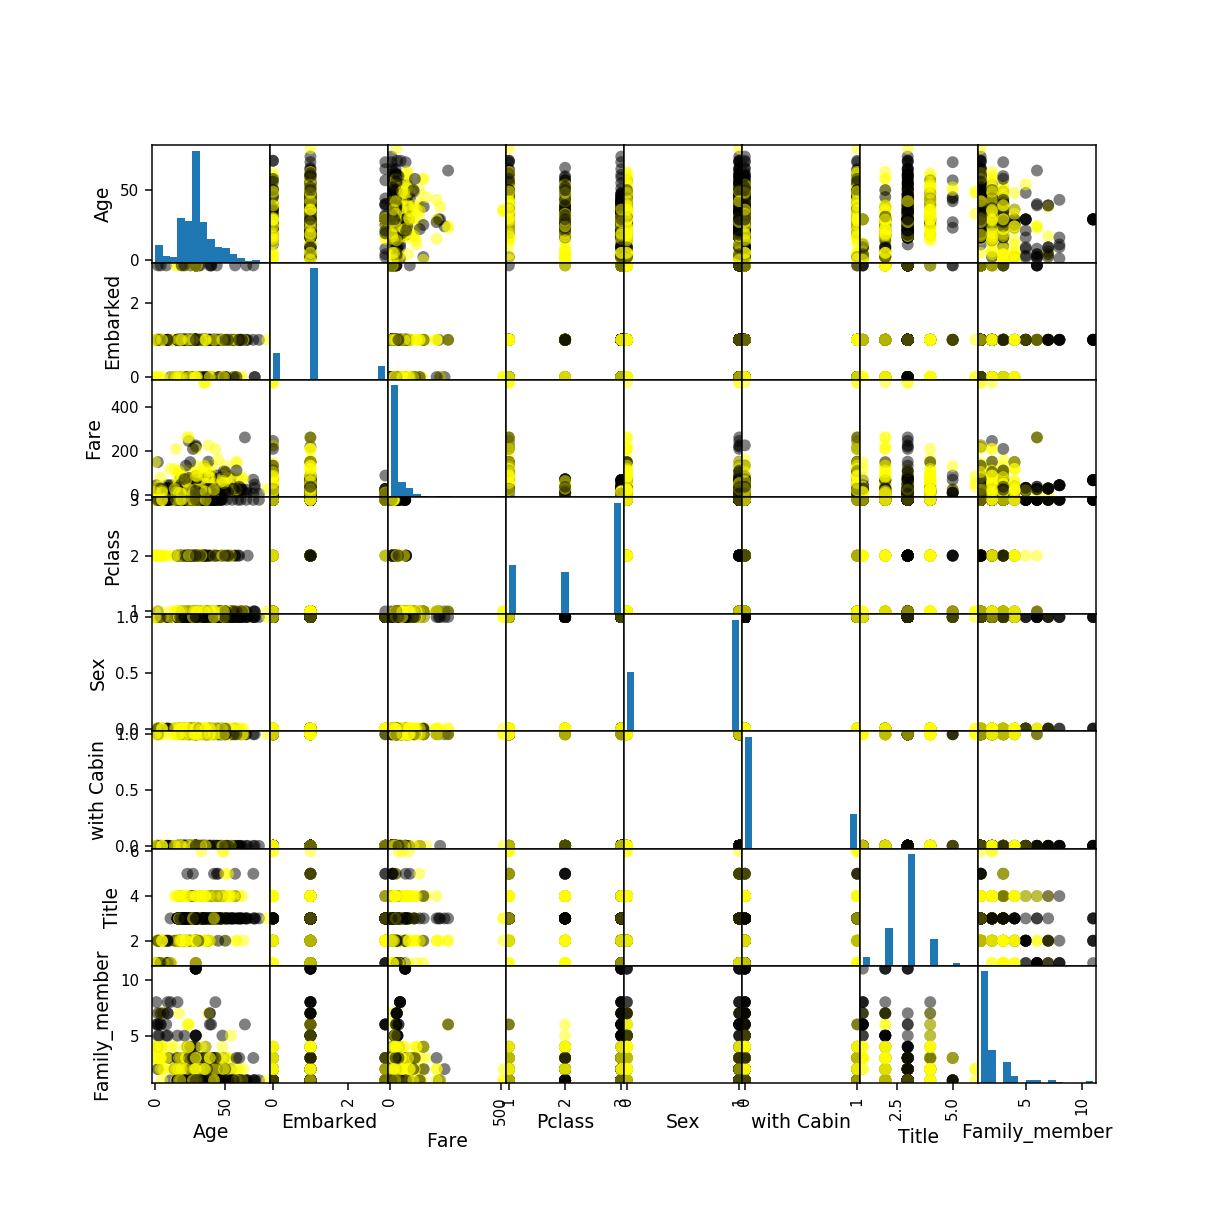

In [29]:
from matplotlib import cm

X = train1[['Age','Embarked','Fare','Pclass','Sex','with Cabin','Title','Family_member']]
y = train1['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

cmap = cm.get_cmap('gnuplot')
scatter = pd.scatter_matrix(X_train, c= y_train, marker = 'o', s=40, hist_kwds={'bins':15}, figsize=(9,9), cmap=cmap)

In [30]:
# For this example, we use the mass, width, and height features of each fruit instance
X = train1[['Age','Embarked','Fare','Pclass','Sex','with Cabin','Title','Family_member']]
y = train1['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)


In [30]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 6)


In [31]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=6, p=2,
           weights='uniform')

In [32]:
knn.score(X_test, y_test)

0.7399103139013453

In [33]:
lookup_survival = dict(zip(train.PassengerId.unique(), train.Survived.unique())) 

In [34]:
lookup_survival

{1: 0, 2: 1}

In [35]:

survival_prediction = knn.predict([[35,1,53,1,0,1,4,2]])
lookup_survival[survival_prediction[0]]

0

In [36]:
#Linear SVM

In [37]:
from sklearn.svm import LinearSVC
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

clf = LinearSVC().fit(X_train, y_train)
print('Titanic Dataset')
print('Accuracy of Linear SVC classifier on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Accuracy of Linear SVC classifier on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))

Titanic Dataset
Accuracy of Linear SVC classifier on training set: 0.70
Accuracy of Linear SVC classifier on test set: 0.72


C:\Users\Jubair\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [38]:
#Decision tree

In [39]:

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 5)
clf = DecisionTreeClassifier().fit(X_train, y_train)

print('Accuracy of Decision Tree classifier on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Accuracy of Decision Tree classifier on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))

Accuracy of Decision Tree classifier on training set: 0.97
Accuracy of Decision Tree classifier on test set: 0.83


In [40]:
#testing input for predict class

In [41]:
survival_prediction = clf.predict([[35,1,53,1,0,1,4,2]])

In [42]:
lookup_survival

{1: 0, 2: 1}

In [45]:
test1 = df_whole.iloc[891:]
# Add labels


In [46]:
test1.head(1)

,Age,Embarked,Fare,Pclass,Sex,with Cabin,Title,Family_member
891,34,3,7,3,1,0,3,1


In [47]:
res = clf.predict(test1)

In [48]:
res = res.reshape(-1,1)

In [49]:
test1['Survived']=res

C:\Users\Jubair\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [50]:
test1['PassengerId'] = test1.index+1

C:\Users\Jubair\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [52]:
test1.head(4)

,Age,Embarked,Fare,Pclass,Sex,with Cabin,Title,Family_member,Survived,PassengerId
891,34,3,7,3,1,0,3,1,0,892
892,47,1,7,3,0,0,4,2,0,893
893,62,3,9,2,1,0,3,1,1,894
894,27,1,8,3,1,0,3,1,1,895


In [53]:
x=test1[['PassengerId','Survived']]
x

,PassengerId,Survived
891,892,0
892,893,0
893,894,1
894,895,1
895,896,0
896,897,0
897,898,0
898,899,0
899,900,1
900,901,0


In [54]:
x.to_csv("C:/Users/Jubair/Desktop/Final_result.csv", index=False, encoding='utf8')